In [1]:
import os
import requests

import pandas as pd

In [2]:
if 'data.csv' not in os.listdir('./Data'):
    url = "https://www.dropbox.com/s/3cml50uv7zm46ly/data.csv?dl=1"
    r = requests.get(url, allow_redirects=True)
    open('./Data/data.csv', 'wb').write(r.content)

# read data
data = pd.read_csv('./Data/data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       439 non-null    int64  
 1   salary       439 non-null    float64
 2   draft_round  439 non-null    int64  
 3   age          439 non-null    int64  
 4   experience   439 non-null    int64  
 5   bmi          439 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 20.7 KB


In [4]:
data.head()

,rating,salary,draft_round,age,experience,bmi
0,97,37436858.0,1,36,17,26.722594
1,97,32742000.0,1,29,9,25.271652
2,96,25842697.0,1,26,7,24.662519
3,96,37199000.0,1,32,13,24.107803
4,96,38199000.0,1,31,11,25.978759


## Stage 1: Linear regression with one independent variable

In [152]:
X = pd.DataFrame(data.rating)
y = data.salary

In [153]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  439 non-null    int64
dtypes: int64(1)
memory usage: 3.6 KB


In [154]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 439 entries, 0 to 438
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
439 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [156]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((307, 1), (132, 1), (307,), (132,))

In [157]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [158]:
y_pred = model.predict(X_test)

In [159]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)

In [160]:
print(f"{model.intercept_:.5f} {model.coef_[0]:.5f} {mape:.5f}")

-92394937.42462 1322928.79254 1.20990


In [186]:
X_ = X.iloc[:, 0].to_numpy()
X_ = X_.reshape((X_.shape[0], 1))
X_data = np.concatenate((np.ones(X_.shape), X_), axis=1)
W = np.array([model.intercept_ , model.coef_[0]]).reshape((2, 1))
y_data = np.matmul(X_data, W)

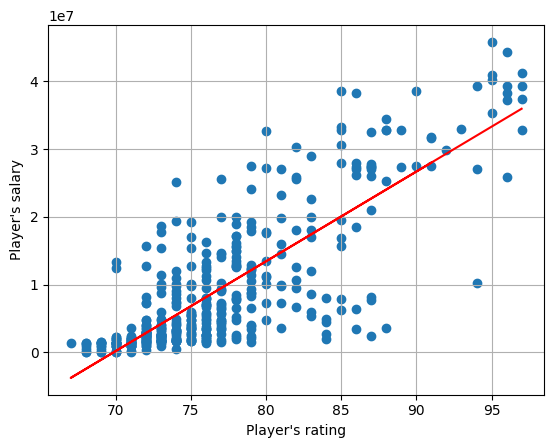

In [189]:
import matplotlib.pyplot as plt

plt.scatter(X_data[:,1], y)
plt.plot(X_data[:,1], y_data, c='red')
plt.xlabel("Player's rating")
plt.ylabel("Player's salary")
plt.grid()

## Stage 2: Linear regression with predictor transformation

In [16]:
def train_and_test_model(power):
    # read data
    data = pd.read_csv('./Data/data.csv')
    X = pd.DataFrame(data.rating)
    y = data.salary
    
    X_ = X.copy()
    for i in range(power-1):
        X_ = X_ * X

    X_train, X_test, y_train, y_test = \
        train_test_split(X_, y, test_size=0.3, random_state=100)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    return mape_score

mape_scores = []
for p in [2,3,4]:
    score = train_and_test_model(p)
    mape_scores.append(score)

print(round(min(mape_scores), 5))

0.94182
[1.0414037939652077, 0.9418168196379301, 1.0765184496984317]


# Stage 3: Linear Regression with many independent variables

In [21]:
import pandas as pd

data = pd.read_csv('./Data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       439 non-null    int64  
 1   salary       439 non-null    float64
 2   draft_round  439 non-null    int64  
 3   age          439 non-null    int64  
 4   experience   439 non-null    int64  
 5   bmi          439 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 20.7 KB


In [23]:
y = data.salary
X = data.drop('salary', axis=1)

In [25]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       439 non-null    int64  
 1   draft_round  439 non-null    int64  
 2   age          439 non-null    int64  
 3   experience   439 non-null    int64  
 4   bmi          439 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 17.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 439 entries, 0 to 438
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
439 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


(None, None)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
import numpy as np

print(np.array2string(model.coef_, separator=',', max_line_width=120)[1:-1])

1187791.26417894, 246170.17905994, 430020.22136812, 182762.6127964 , -87689.58520294


## Stage 4: Check multicolinearity

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./Data/data.csv')
corr = data.corr()

In [93]:
strong_corr_vars = []
for j in range(0, corr.values.shape[1]):
    if j != 1 and corr.values[1,j] > 0.2:
        print(corr.columns[j])        
        strong_corr_vars.append(corr.columns[j])

rating
age
experience


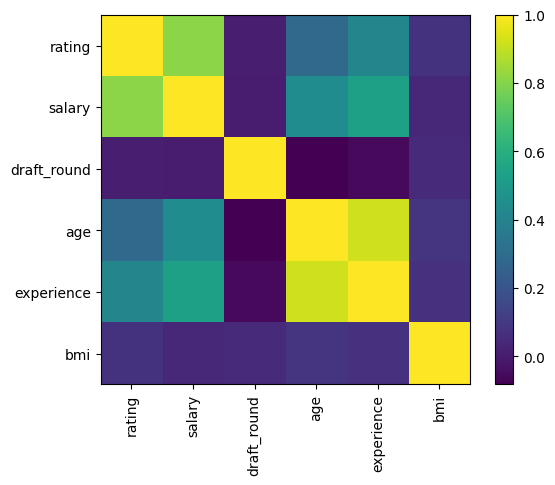

In [70]:
plt.imshow(corr);
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns,);
plt.colorbar();

In [71]:
X = data.drop('salary', axis=1)
y = data.salary

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_scores = []

for v in strong_corr_vars:
    print('creating a model w/o:', v)
    X_tr, X_ts = X_train.drop(v, axis=1), X_test.drop(v, axis=1)
    
    model = LinearRegression()
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_ts)
    mape_scores.append(mape(y_test, y_pred))
    print(mape_scores[-1])

creating a model w/o: rating
2.707355066874804
creating a model w/o: age
1.3974694118065496
creating a model w/o: experience
1.4696432658672405


In [91]:
for i in range(len(strong_corr_vars)):
    for j in range(i+1, len(strong_corr_vars)):
        print('creating a model w/o:', strong_corr_vars[i], strong_corr_vars[j])
        X_tr = X_train.drop([strong_corr_vars[i], strong_corr_vars[j]], axis=1)
        X_ts = X_test.drop([strong_corr_vars[i], strong_corr_vars[j]], axis=1)
        
        model = LinearRegression()
        model.fit(X_tr, y_train)
        y_pred = model.predict(X_ts)
        mape_scores.append(mape(y_test, y_pred))
        print(mape_scores[-1])        

creating a model w/o: rating age
2.6766299565616904
creating a model w/o: rating experience
2.9659652418844282
creating a model w/o: age experience
1.227887960689966


In [89]:
round(min(mape_scores), 5)

1.22789

## Stage 5: Dealing with Negative Predictions

In [121]:
data = pd.read_csv('./Data/data.csv')
X = data.drop(['salary', 'age', 'experience'], axis=1)
y = data.salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [131]:
# Replacing negative predictions with zero
y_ngzero = y_pred.copy()
y_ngzero[y_ngzero < 0] = 0
ngzero_score = mape(y_test, y_ngzero)

In [132]:
# Replacing negative predictions with y_train.median
y_ngmedian = y_pred.copy()
y_ngmedian[y_ngmedian < 0] = y_train.median()
ngmed_score = mape(y_test, y_ngmedian)

In [130]:
if ngzero_score < ngmed_score:
    print(round(ngzero_score, 5))
else:
    print(round(ngmed_score, 5))

0.94701


In [139]:
print("No negative replacement:", round(mape(y_test, y_pred), 5))
print("Replace with zero:", round(ngzero_score, 5))
print("Replace with y_train's median:", round(ngmed_score, 5))

No negative replacement: 1.22789
Replace with zero: 0.94701
Replace with y_train's median: 1.96691
